In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

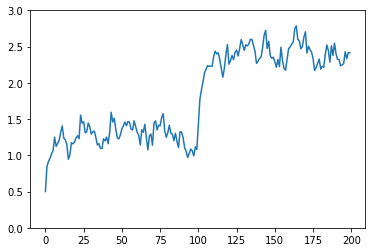

In [49]:
n = 100
m = 100
np.random.seed(190823)
sigma = 0.1
e = np.random.normal(loc=0, scale=sigma, size=m+n-1)
y = np.zeros(n+m)
y[0] = 0.5
phi = 0.7
c = (0.4, 0.7)

for i in range(1, n):
    y[i] = c[0] + phi*y[i-1] + e[i-1]
for j in range(n, n+m):
    y[j] = c[1] + phi*y[j-1] + e[j-1]

plt.plot(y)
plt.ylim(0, 3)
plt.show()

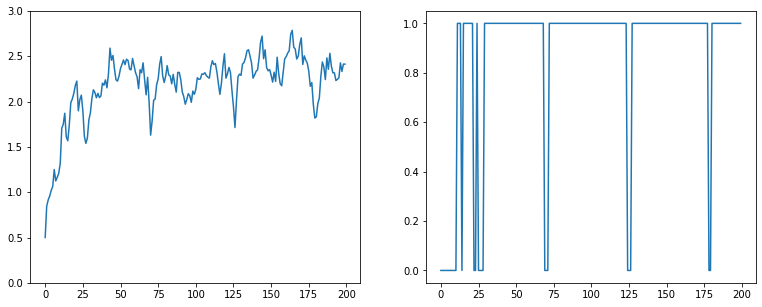

In [138]:
n = 200
np.random.seed(190823)
sigma = 0.1
e = np.random.normal(loc=0, scale=sigma, size=m+n-1)
y = np.zeros(n)
y[0] = 0.5
phi = 0.7

c = (0.4, 0.7)
p11 = 0.8
p22 = 0.95
P = np.array([[p11, 1-p11],
              [1-p22, p22]])
idx_trace = np.zeros(n)
idx = 0
idx_trace[0] = idx
for i in range(1, n):
    idx = np.random.choice(a=[0, 1], p=P[idx])
    c_cur = c[idx]
    y[i] = c_cur + phi*y[i-1] + e[i-1]
    idx_trace[i] = idx

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(y)
plt.ylim(0, 3)
plt.subplot(1,2,2)
plt.plot(idx_trace)
plt.show()

In [217]:
phi = 0.7
p11 = 0.8
p22 = 0.95
sigma = 0.1
c1 = 0.4
c2 = 0.7

In [263]:
import scipy.optimize
def obj_fun(param):
    phi, p11, p22, sigma, c1, c2 = param
    n = 200
    c = c1, c2
    xi = np.zeros([n, 2])
    xi[0] = (1-p11)/(2-p22-p11), (1-p22)/(2-p11-p22)
    P = np.array([[p11, 1-p11],
                  [1-p22, p22]])
    loglik = 0
    for i in range(1, n):
        eta = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(y[i]-c-phi*y[i-1])**2/(2*sigma**2))
        prob = xi[i-1]@P@eta
        loglik += np.log(prob)
        xi[i] = xi[i-1]@P*eta/prob
    return loglik

In [264]:
param = (phi, p11, p22, sigma, c1, c2)
obj_fun(param)

139.6022925349057

In [265]:
res = scipy.optimize.minimize(obj_fun, x0=param)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  
